# Investigation of b-tag score and its dependence on mHreco

In [1]:
NMSSM_MX_700_MY_400 = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'
JetHT_Data_UL = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/JetHT_Data_UL/ntuple.root'

In [6]:
from utils.analysis import Tree

In [7]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [8]:
sigTree = Tree(NMSSM_MX_700_MY_400)
sigTree.initialize_t6_X()

sig_X = sigTree.t6_X

In [9]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [10]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

### <span style="font-variant:small-caps;"><font size=4>Region</font></span>: <font size=3>Masks</font>

In [13]:
import awkward as ak

In [14]:
### SIGNAL ###
sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# triple mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

In [36]:
sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)/6
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[~dat_SR]/6

dat_hi = dat_sums >= 0.66
dat_lo = dat_sums < 0.66

In [ ]:
Dm_cand = np.column_stack(([abs(self.get(mH,'np') - 125) for mH in higgs]))
Dm_cand = Dm_cand * Dm_cand
Dm_cand = Dm_cand.sum(axis=1)
Dm_cand = np.sqrt(Dm_cand)
A_SR = Dm_cand <= SR_edge # SR
A_CR = (Dm_cand > SR_edge) & (Dm_cand <= VR_edge) # VR

Dm_cand = np.column_stack(([abs(self.get(mH,'np') - 185) for mH in higgs]))
Dm_cand = Dm_cand * Dm_cand
Dm_cand = Dm_cand.sum(axis=1)
Dm_cand = np.sqrt(Dm_cand)
V_SR = Dm_cand <= SR_edge # SR
V_CR = (Dm_cand > SR_edge) & (Dm_cand <= VR_edge) # VR

score_cut = 0.66

ls_mask = self.btag_avg < score_cut # ls
hs_mask = self.btag_avg >= score_cut # hs

if normalized:
    A_CRls_yield = ak.sum(A_CR & ls_mask)*self.scale
    A_CRhs_yield = ak.sum(A_CR & hs_mask)*self.scale
    A_SRls_yield = ak.sum(A_SR & ls_mask)*self.scale
    # A_SRhs_yield = ak.sum(SR & hs_mask)*self.scale

    V_CRls_yield = ak.sum(V_CR & ls_mask)*self.scale
    V_CRhs_yield = ak.sum(V_CR & hs_mask)*self.scale
    V_SRls_yield = ak.sum(V_SR & ls_mask)*self.scale
    V_SRhs_yield = ak.sum(V_SR & hs_mask)*self.scale

In [34]:
len(dat_Dm_cand)

366464

In [35]:
len(dat_sums)

399156

In [40]:
#### DATA ####

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)[~dat_SR]
dat_Dm      = (datTree.t6_higgs_m - 125)[~dat_SR]

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
# dat_CR = ak.all(dat_Dm_cand <= CR_edge, axis=1) # CR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

dat_CRls = ak.sum(dat_CR[dat_lo])
dat_CRhs = ak.sum(dat_CR[dat_hi])
dat_VRls = ak.sum(dat_VR[dat_lo])
dat_VRhs = ak.sum(dat_VR[dat_hi])

dat_tot = ak.sum(dat_CR) + ak.sum(dat_VR) + ak.sum(dat_SR)

print("dat_CRls =",dat_CRls,int(dat_CRls/dat_tot*100))
print("dat_CRhs =",dat_CRhs,int(dat_CRhs/dat_tot*100))
print("dat_VRls =",dat_VRls,int(dat_VRls/dat_tot*100))
print("dat_VRhs =",dat_VRhs,int(dat_VRhs/dat_tot*100))

dat_CRls = 52039 45
dat_CRhs = 7152 6
dat_VRls = 21087 18
dat_VRhs = 3316 2


In [17]:
sig_m1 = sigTree.t6_higgs_m[:,0]
sig_m2 = sigTree.t6_higgs_m[:,1]
sig_m3 = sigTree.t6_higgs_m[:,2]

dat_m1 = datTree.t6_higgs_m[:,0][~dat_SR]
dat_m2 = datTree.t6_higgs_m[:,1][~dat_SR]
dat_m3 = datTree.t6_higgs_m[:,2][~dat_SR]

In [19]:
import numpy as np

In [25]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

mHbins = np.linspace(0,600,100)
score_bins = np.linspace(0.35,1,100)

In [21]:
import matplotlib.pyplot as plt

In [23]:
from utils.plotter import Hist2d

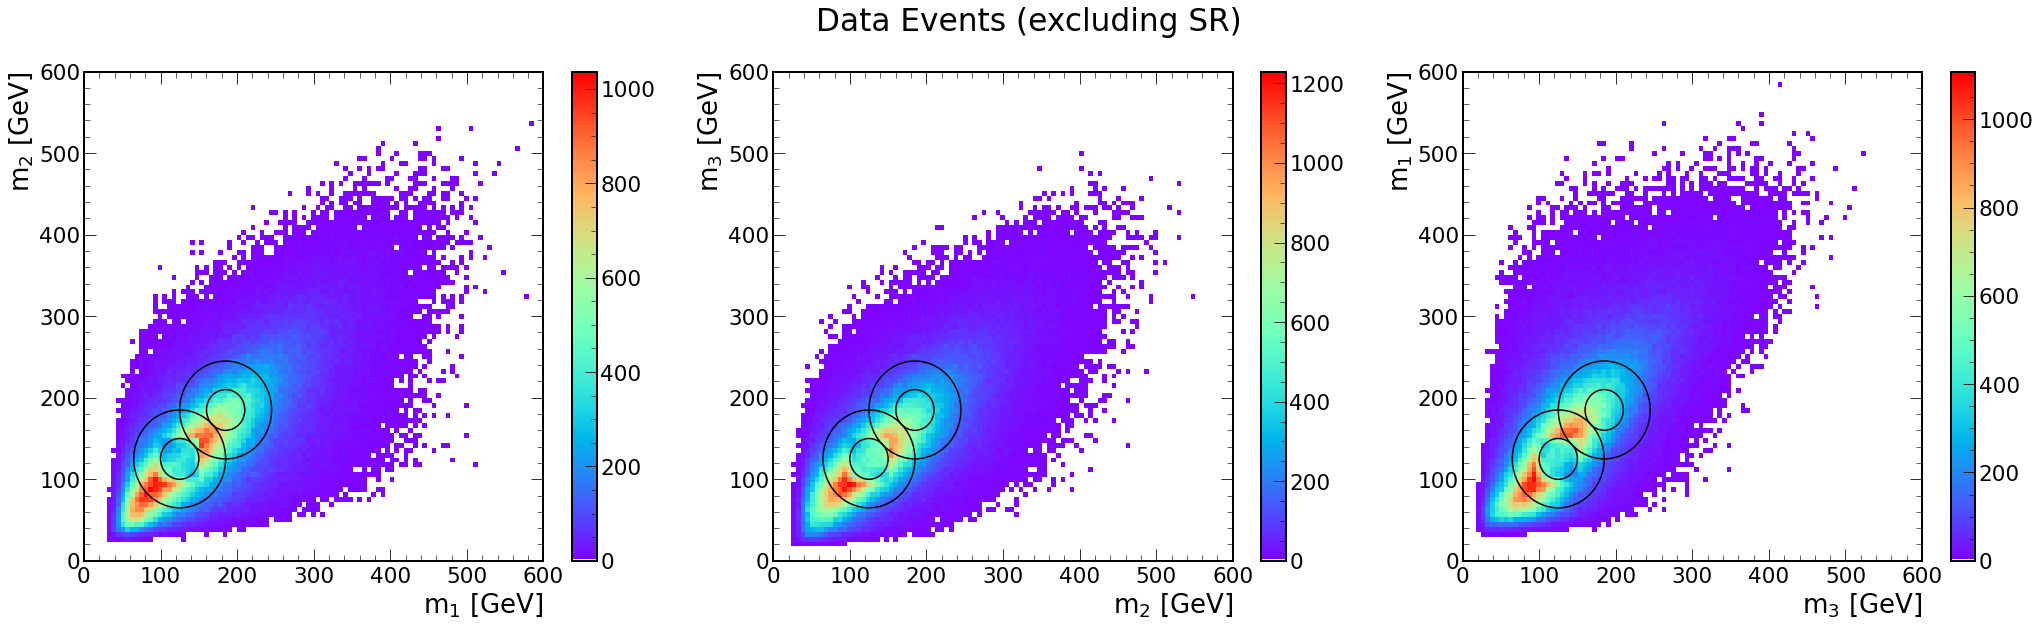

In [41]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

# ax = axs[0]
# n,xe,ye,im = Hist2d(dat_m1, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[1]
# n,xe,ye,im = Hist2d(dat_m2, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[2]
# n,xe,ye,im = Hist2d(dat_m3, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# for i,ax in enumerate(axs.flatten()):
#     ax.set_ylabel('Average b-tag score')
#     ax.set_xlabel(f'$m_{i+1}$ [GeV]')
#     ax.plot([mHbins.min(), mHbins.max()],[0.66,0.66], color='k')
#     ax.plot([100,100],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([150,150],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([65,65],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([185,185],[score_bins.min(), score_bins.max()], color='k')

# fig.suptitle('Data Events (excluding SR)')

# fig.savefig('../plots/Data_SRexclusion_btag_v_mHreco.pdf', bbox_inches='tight')


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
fig.suptitle('Data Events (excluding SR)')

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
    ax.add_artist(draw_circle)
    draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
    ax.add_artist(draw_circle)
    draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
    ax.add_artist(draw_circle)
    draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
    ax.add_artist(draw_circle)
    # ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')
    if i ==2: i = -1
    ax.set_ylabel(f'$m_{i+2}$ [GeV]')
fig.savefig('../plots/Data_SRexclusion_mHreco.pdf', bbox_inches='tight')

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
# fig.suptitle('Data Events (high b-tag, excluding SR)')

# ax = axs[0]
# n,xe,ye,im = Hist2d(dat_m1[dat_hi], dat_m2[dat_hi], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[1]
# n,xe,ye,im = Hist2d(dat_m2[dat_hi], dat_m3[dat_hi], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[2]
# n,xe,ye,im = Hist2d(dat_m3[dat_hi], dat_m1[dat_hi], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# for i,ax in enumerate(axs.flatten()):
#     draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     # ax.set_ylabel('Average b-tag score')
#     ax.set_xlabel(f'$m_{i+1}$ [GeV]')
#     if i ==2: i = -1
#     ax.set_ylabel(f'$m_{i+2}$ [GeV]')

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
# fig.suptitle('Data Events (low btag, excluding SR)')

# ax = axs[0]
# n,xe,ye,im = Hist2d(dat_m1[dat_lo], dat_m2[dat_lo], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[1]
# n,xe,ye,im = Hist2d(dat_m2[dat_lo], dat_m3[dat_lo], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[2]
# n,xe,ye,im = Hist2d(dat_m3[dat_lo], dat_m1[dat_lo], bins=(mHbins, mHbins), ax=ax)
# fig.colorbar(im, ax=ax)

# for i,ax in enumerate(axs.flatten()):
#     draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
#     ax.add_artist(draw_circle)
#     # ax.set_ylabel('Average b-tag score')
#     ax.set_xlabel(f'$m_{i+1}$ [GeV]')
#     if i ==2: i = -1
    # ax.set_ylabel(f'$m_{i+2}$ [GeV]')

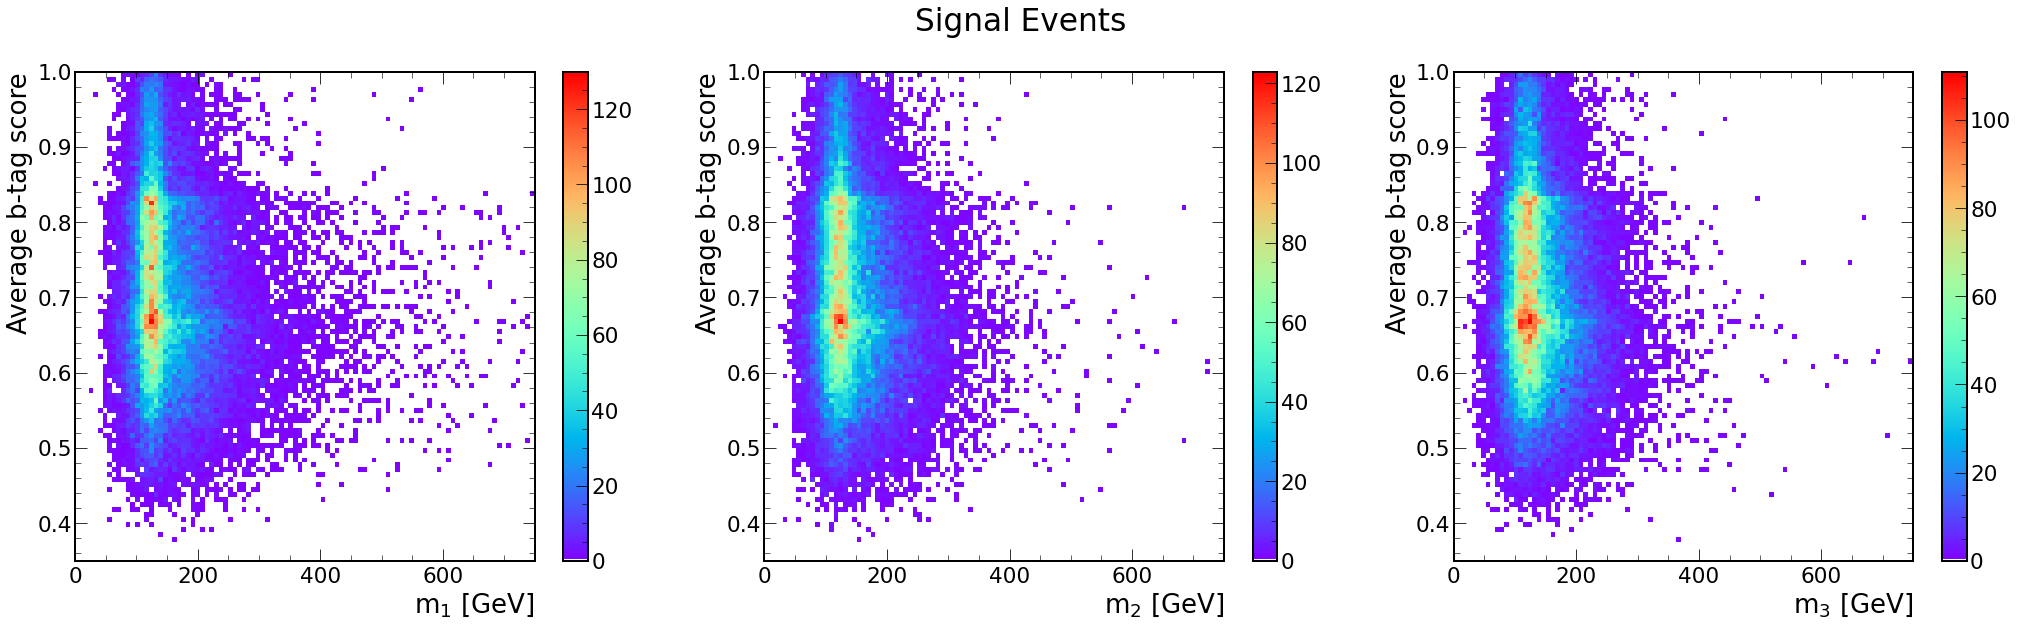

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(sig_m1, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(sig_m2, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(sig_m3, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Signal Events')

fig.savefig('Signal_700_400_btag_v_mHreco.pdf', bbox_inches='tight')

In [ ]:
sig_4sums = ak.sum(sigTree.t6_jet_btag[:,:4], axis=1)/4
dat_4sums = ak.sum(datTree.t6_jet_btag[:,:4], axis=1)[~dat_SR]/4

Text(0.5, 0.98, 'Data Events (excluding SR)')

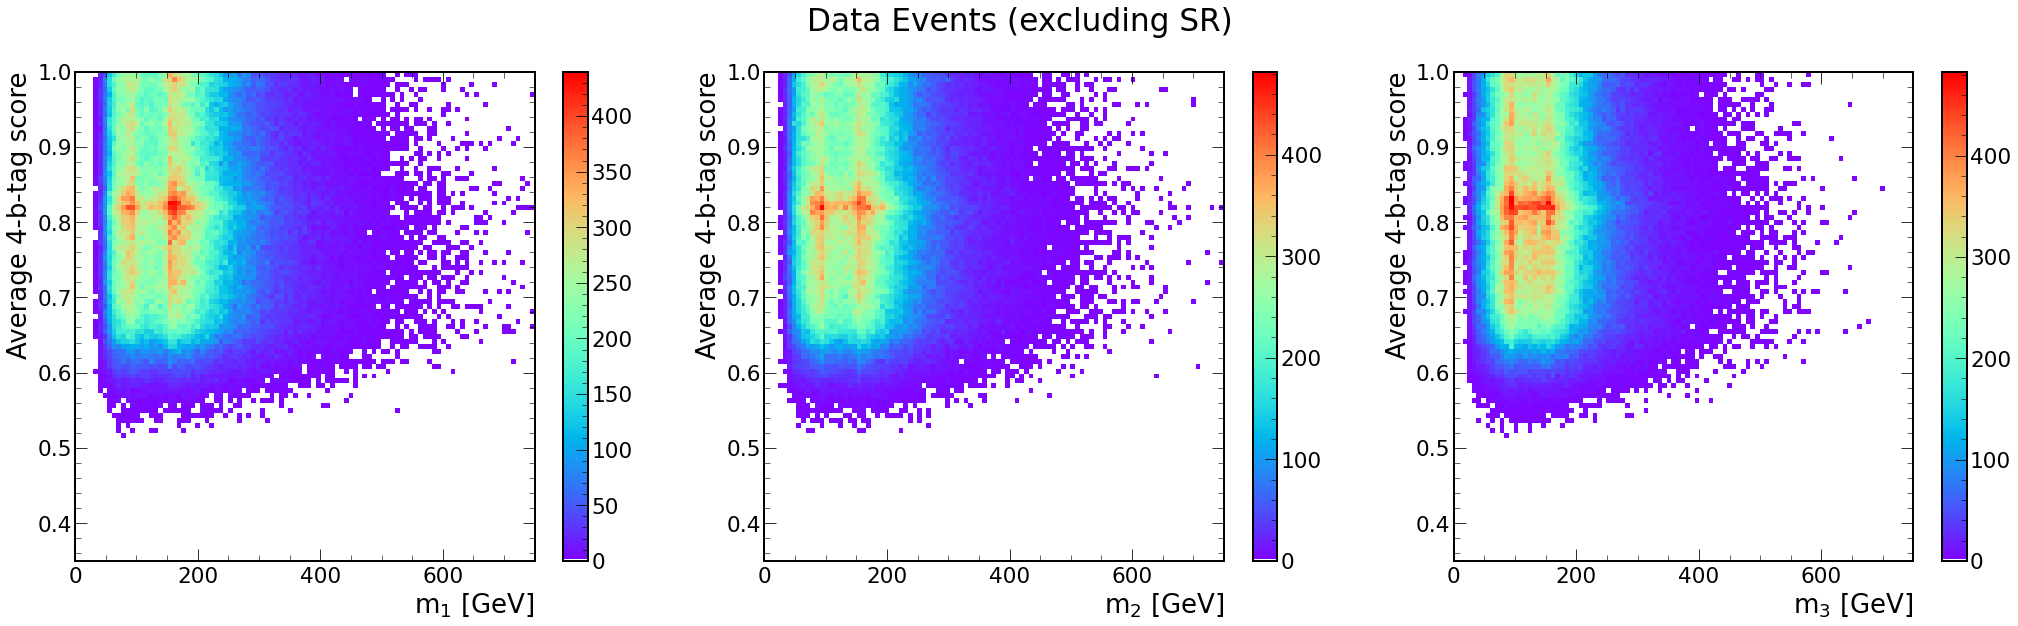

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average 4-b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Data Events (excluding SR)')